# Automobile Data Set

## Load Data

In [1]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# read all dataset

mobile_spec = pd.read_csv('automobile-spec.csv')
mobile_risk = pd.read_csv('automobile-risk.csv')
mobile_losses = pd.read_csv('automobile-losses.csv')

In [3]:
# dimensi masing-masing dataset

print(mobile_spec.shape)
print(mobile_risk.shape)
print(mobile_losses.shape)

(205, 25)
(205, 2)
(205, 2)


## Part I

### 1. Join 3 tables using ID as key

In [4]:
# join table tdk bisa langsung 3 tabel
# setiap join hanya untuk 2 tabel
# jadi untuk 3 tabel menggunakan 2 join

mobile = pd.merge(mobile_spec, mobile_risk, how = 'inner', on = 'ID').round(2)
mobile = pd.merge(mobile, mobile_losses, how = 'inner', on = 'ID').round(2)
mobile.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3,NaN
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3,NaN
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,NaN
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2,164.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2,164.0


### 2. Quick-look (dimension, data type, head/tail, summary statistics, dll)

#### Dimensi data

Tabel mobile terdiri atas 27 kolom dan 205 datum/baris

In [5]:
mobile.shape

(205, 27)

#### Tipe Data

Tipe data pada tabel mobile : string/object, integer, dan float

In [6]:
mobile.dtypes

ID                     int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheel           object
engine-loc            object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
cylinder              object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
symboling              int64
normalized-losses    float64
dtype: object

#### Statistik Deskriptif

In [7]:
# Statistik deskriptif dari tabel mobile
# round(2) digunakan untuk pembulatan angka 2 desimal

mobile.describe().round(2)

,ID,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,201.00,201.00,205.00,203.00,203.00,205.00,205.00,201.00,205.00,164.00
mean,103.00,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.26,5125.37,25.22,30.75,13207.13,0.83,122.00
std,59.32,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.32,3.97,39.71,479.33,6.54,6.89,7947.07,1.25,35.44
min,1.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00,-2.00,65.00
25%,52.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7775.00,0.00,94.00
50%,103.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00,1.00,115.00
75%,154.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.59,3.41,9.40,116.00,5500.00,30.00,34.00,16500.00,2.00,150.00
max,205.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00,3.00,256.00


### 3. Identify missing value. If any, how will you handle it?
Terdapat missing values pada:
<br> 1. normalized-losses    41
<br> 2. price                 4
<br> 3. stroke                4
<br> 4. bore                  4
<br> 5. peak-rpm              2
<br> 6. horsepower            2
<br> 7. num-of-doors          1

In [8]:
# Missing Value detection

count_missing = mobile.isnull().sum().sort_values(ascending = False)
count_missing.head(10)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          1
width                 0
make                  0
fuel-type             0
dtype: int64

In [9]:
# Persentase missing values untuk setiap features

percentage = round(mobile.isnull().sum()/len(mobile)*100,2).sort_values(ascending = False)
percentage.head(10)

# Missing values untuk setiap features < 40% sehingga dapat dikatakan bahwa
# Seluruh features yang ada memiliki keterkaitan dan pengaruh

normalized-losses    20.00
price                 1.95
stroke                1.95
bore                  1.95
peak-rpm              0.98
horsepower            0.98
num-of-doors          0.49
width                 0.00
make                  0.00
fuel-type             0.00
dtype: float64

#### Menggantikan missing value dengan nilai mean

Pada studi kasus ini dipilih 'mean' untuk mewakili nilai data yang null

In [10]:
# Replace missing value dengan mean

mobile = mobile.fillna(mobile.mean())
mobile.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3,122.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3,122.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,122.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2,164.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2,164.0


#### Missing value setelah replace data dengan mean

Dilakukan pengecekan missing value setelah penggantian nilai null dengan mean
<br>
Ternyata masih ditemukan 1 missing value dengan tipe data object/string
<br>
Langkah selanjutnya nilai missing value tersebut diputuskan untuk dihapuskan saja

In [11]:
# Missing value detection setelah replacement dengan nilai mean

count_missing = mobile.isnull().sum().sort_values(ascending = False)
count_missing.head()

num-of-doors         1
normalized-losses    0
curb-weight          0
make                 0
fuel-type            0
dtype: int64

#### Drop 1 missing value pada num-of-doors

In [12]:
# Drop 1 baris pada tabel yang terdapat nilai null (missing value)

mobile = mobile.dropna()
mobile.shape

(204, 27)

#### Missing value sudah hilang

In [13]:
# Final missing values detection

count_missing = mobile.isnull().sum().sort_values(ascending = False)
count_missing.head()

normalized-losses    0
curb-weight          0
make                 0
fuel-type            0
aspiration           0
dtype: int64

### 4. Perform visualization using at least 5 difference visualization technique (barplot, scatterplot, area, boxplot, pie chart, line chart, etc)

#### Data categorical vs. numerical

Penentuan variabel categorical dan numerical
<br>
Untuk mempermudah dalam EDA

In [14]:
# variable categorical

kategorik = ['make','fuel-type','aspiration','num-of-doors', 'body-style', 'drive-wheel', 'engine-loc', 'engine-type',
            'cylinder', 'fuel-system']
categorical = mobile[kategorik]
categorical.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,engine-type,cylinder,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [15]:
# variable numerical

numerical = mobile.drop(kategorik, axis=1)
numerical.head()

,ID,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3,122.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3,122.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,122.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2,164.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2,164.0


In [16]:
# Statistik deskriptif dari categorical features pada tabel mobile

categorical.describe()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,engine-type,cylinder,fuel-system
count,204,204,204,204,204,204,204,204,204,204
unique,22,2,2,3,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,184,168,114,95,119,201,147,158,93


In [17]:
# Statistik deskriptif dari numerical features pada tabel mobile

numerical.describe()

,ID,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.00000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,103.367647,98.781373,174.131373,65.918137,53.740196,2557.352941,127.04902,3.331221,3.254763,10.155000,104.267217,5123.533034,25.225490,30.754902,13229.919203,0.833333,121.872549
std,59.233920,6.026096,12.311367,2.145361,2.439646,521.330463,41.69556,0.270690,0.314226,3.977791,39.616111,477.425419,6.557674,6.903182,7881.340541,1.248316,31.706217
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.00000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,-2.000000,65.000000
25%,52.750000,94.500000,166.675000,64.100000,52.000000,2145.000000,97.00000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7784.750000,0.000000,101.000000
50%,103.500000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.00000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10646.500000,1.000000,122.000000
75%,154.250000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.00000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.000000,2.000000,137.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.00000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,3.000000,256.000000


#### Visualisasi Categorical Features

Dari countplot categorical features dapat dikatakan bahwa
1. Bahan bakar yang lebih banyak digunakan adalag GAS dibandingkan dengan diesel
2. Apirasi yang lebih banyak muncul adalah STD dibandingkan dengan turbo
3. Model mobil yang lebih diminati adalah SEDAN dibandingkan dengan yang lainnya
4. Drive wheel yang lebih banyak digunakan adalah FWD
5. Lokasi engine lebih banyak pada FRONT dibandingkan dengan rear
6. Engine type yang lebih banyak digunakan adalah OHC dibandingkan dengan yang lainnya. Kemudian dapat dilihat bahwa terdapat ketimpangan yang sangat signifikan antara OHC dengan tipe lainnya 
7. Cylinder yang lebih banyak digunakan FOUR dibandingkan dengan yang lainnya. Kemudian dapat dilihat bahwa terdapat ketimpangan yang sangat signifikan antara FOUR cylinder dengan tipe lainnya
8. Fuel System yang lebih banyak digunakan MPFI dibandingkan dengan yang lainnya

Text(0,0.5,'')

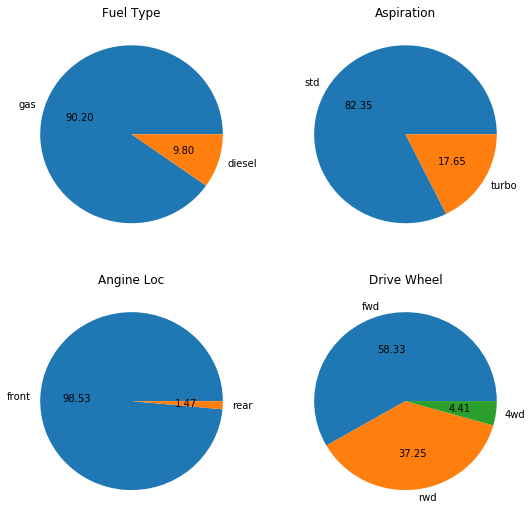

In [18]:
f=plt.figure(figsize=(9,9))

f.add_subplot(2,2,1)
mobile['fuel-type'].value_counts().plot.pie(autopct='%.2f')
plt.title('Fuel Type')
plt.ylabel('')

f.add_subplot(2,2,2)
mobile['aspiration'].value_counts().plot.pie(autopct='%.2f')
plt.title('Aspiration')
plt.ylabel('')

f.add_subplot(2,2,3)
mobile['engine-loc'].value_counts().plot.pie(autopct='%.2f')
plt.title('Angine Loc')
plt.ylabel('')

f.add_subplot(2,2,4)
mobile['drive-wheel'].value_counts().plot.pie(autopct='%.2f')
plt.title('Drive Wheel')
plt.ylabel('')

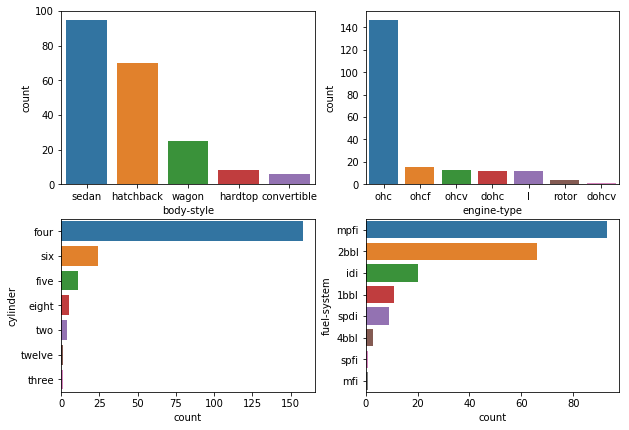

In [19]:
f=plt.figure(figsize=(10,7))

f.add_subplot(2,2,1)
sns.countplot(x = mobile['body-style'], order = mobile['body-style'].value_counts().index)

f.add_subplot(2,2,2)
sns.countplot(x = mobile['engine-type'], order = mobile['engine-type'].value_counts().index)

f.add_subplot(2,2,3)
sns.countplot(y = mobile['cylinder'], order = mobile['cylinder'].value_counts().index)

f.add_subplot(2,2,4)
sns.countplot(y = mobile['fuel-system'], order = mobile['fuel-system'].value_counts().index)

#### Visualisasi Numerical Features
#### Histogram Risk Rating (Symboling) dan Normalized Losses

Melihat distribusi Risk Rating dan Normalized Losses terhadap banyaknya kendaraan pada data mobile

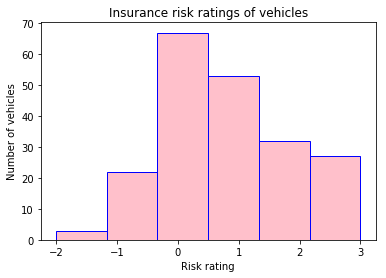

In [20]:
# histogram dari symboling : risk rating
# melihat persebaran risk rating terhadap banyaknya kendaraan
# histogram tdk boleh dan tdk dapat diurutkan karena akan melihat distribusinya

plt.hist(mobile['symboling'], bins = 6,facecolor = 'pink', edgecolor = 'blue')
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

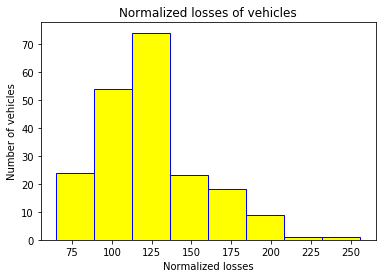

In [21]:
# histogram nirmalized losses
# melihat persebaran normalized losses terhadap banyaknya kendaraan
# histogram tdk boleh dan tdk dapat diurutkan karena akan melihat distribusinya

plt.hist(mobile['normalized-losses'], bins = 8, facecolor = 'yellow', edgecolor = 'blue');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');

#### Correlation

Menentukan korelasi antar variabelpada tabel mobile
<br> Untuk mengetahui hubungan antar features pada tabel mobile
<br> Sehingga dapat dilihat hal menarik antar hubungan yang ada
<br> Untuk kemudian dapat ditentukan features mana saja yang menarik untuk dilihat lebih detail

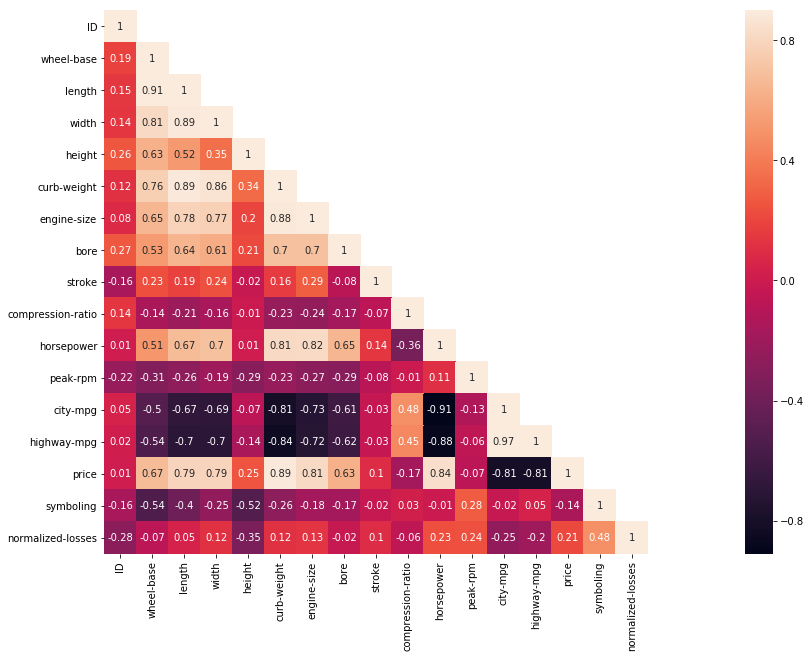

In [22]:
#create correlation
corr = mobile.corr(method = 'spearman').round(2)

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(35,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

#### Scatterplot Curb Weight, Horsepower, dan Engine Size vs. Price

Variabel yang memiliki korelasi tinggi dengan Price

Text(0,0.5,'Price')

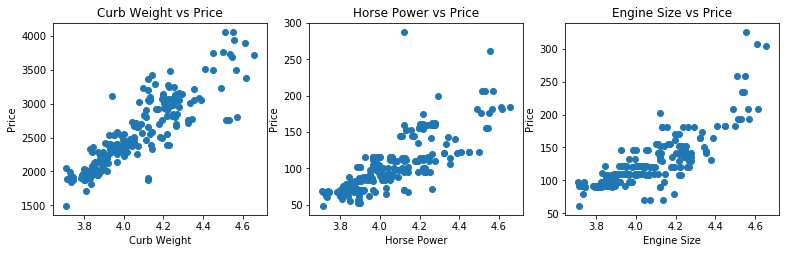

In [23]:
# Sactterplot variabel yang memiliki korelasi (+) tinggi dengan Price

f = plt.figure(figsize=(13,12))

f.add_subplot(3,3,1)
plt.scatter(np.log10(numerical['price']),numerical['curb-weight'])
plt.title('Curb Weight vs Price')
plt.xlabel('Curb Weight')
plt.ylabel('Price')

f.add_subplot(3,3,2)
plt.scatter(np.log10(numerical['price']),numerical['horsepower'])
plt.title('Horse Power vs Price')
plt.xlabel('Horse Power')
plt.ylabel('Price')

f.add_subplot(3,3,3)
plt.scatter(np.log10(numerical['price']),numerical['engine-size'])
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')

#### Boxplot Make vs. Price

Dilakukan untuk melihat distribusi harga pada masing-masing brand

Text(0,0.5,'Price')

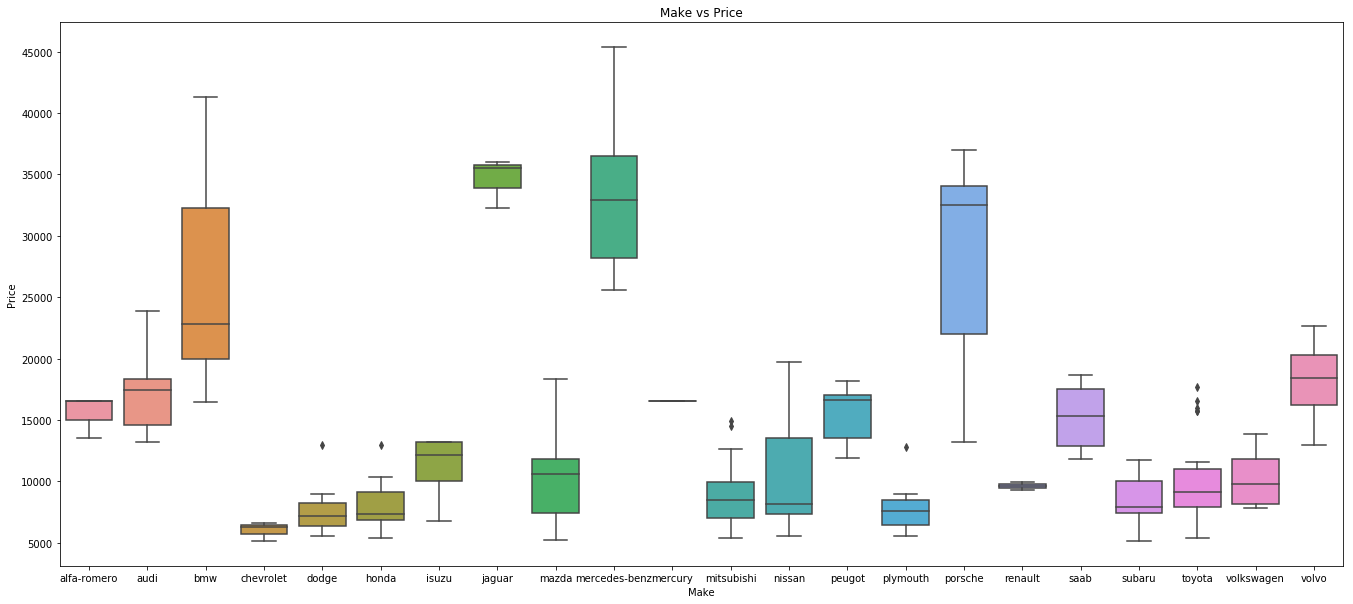

In [24]:
# Boxplot variabel 'make' dengan 'price' untuk melihat distribusi harga pada masing-masing brand

plt.rcParams['figure.figsize'] = (23,10)
ax = sns.boxplot(x = 'make', y = 'price', data = mobile)
plt.title('Make vs Price')
plt.xlabel('Make')
plt.ylabel('Price')

#### Boxplot Drive Wheel vs. Price

Dilakukan untuk mengetahui distribusi harga mobil dengan perbandingan drive wheel

Text(0,0.5,'Price')

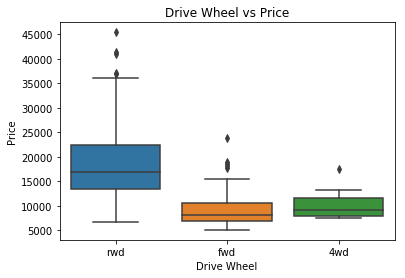

In [25]:
plt.rcParams['figure.figsize'] = (6,4)
ax = sns.boxplot(x = 'drive-wheel', y = 'price', data = mobile)
plt.title('Drive Wheel vs Price')
plt.xlabel('Drive Wheel')
plt.ylabel('Price')

## Part II

### 1. Car brand with highest price

Car brand with highest price : mercedes-benz

In [26]:
car_brand = mobile.sort_values(by = ['price'], ascending = False).head(1)[['make','price']]
car_brand

,make,price
74,mercedes-benz,45400.0


### 2. Maximum horsepower for car with 6 cylinder engine

Maximum horsepower for car with 'six' cylinder engine : 207

In [27]:
horsepower = mobile[mobile.cylinder == 'six'].sort_values(by = ['horsepower'], ascending = False).head(1)[['horsepower','cylinder']]
horsepower

,horsepower,cylinder
126,207.0,six


### 3. Average peak-rpm for 'turbo' style aspiration car

Average peak-rpm for 'turbo' style aspiration car : 4923.61

In [28]:
average_peakrpm = mobile[mobile.aspiration == 'turbo']['peak-rpm'].mean()
average_peakrpm

4923.611111111111

### 4. Average price based on body-style

In [29]:
pd.DataFrame(mobile.groupby(['body-style']).mean().round(2)['price'])

,price
body-style,
convertible,21890.50
hardtop,22208.50
hatchback,10050.29
sedan,14495.51
wagon,12371.96


### 5. Average price based on body-tyle only for Honda Car (make = Honda)

In [30]:
honda = mobile[mobile['make'] == 'honda']
honda

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
30,31,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,...,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0,2,137.0
31,32,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,...,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0,2,137.0
32,33,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,...,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0,1,101.0
33,34,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,...,2.91,3.41,9.2,76.0,6000.0,30,34,6529.0,1,101.0
34,35,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,...,2.91,3.41,9.2,76.0,6000.0,30,34,7129.0,1,101.0
35,36,honda,gas,std,four,sedan,fwd,front,96.5,163.4,...,2.91,3.41,9.2,76.0,6000.0,30,34,7295.0,0,110.0
36,37,honda,gas,std,four,wagon,fwd,front,96.5,157.1,...,2.92,3.41,9.2,76.0,6000.0,30,34,7295.0,0,78.0
37,38,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,...,3.15,3.58,9.0,86.0,5800.0,27,33,7895.0,0,106.0
38,39,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,...,3.15,3.58,9.0,86.0,5800.0,27,33,9095.0,0,106.0
39,40,honda,gas,std,four,sedan,fwd,front,96.5,175.4,...,3.15,3.58,9.0,86.0,5800.0,27,33,8845.0,0,85.0


In [31]:
pd.DataFrame(honda.groupby(['body-style']).mean().round(2)['price'])

,price
body-style,
hatchback,7054.43
sedan,9945.00
wagon,7295.00
